# Завдання на Лабоарторну роботу №3

## Перша частина - Бінарна класифікація (Binary Classification) з генерацією даних:


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np                   # NumPy для роботи з числовими даними

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


In [76]:
# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів у наборі даних
    n_features=2,    # Кількість ознак
    n_informative=2, # Кількість інформативних ознак
    n_redundant=0,   # Кількість зайвих ознак
    n_clusters_per_class=1, # Кількість кластерів на клас
    random_state=42   # Випадковий стан для відтворюваності
)

# Об'єднаємо ознаки та мітки у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Target'])

# Збережемо дані у CSV файл
df.to_csv('data_for_part1.csv', index=False)

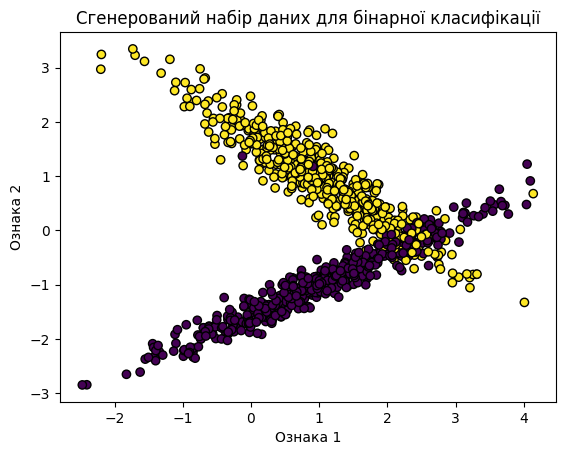

In [77]:
# Відобразимо створений набір даних
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Сгенерований набір даних для бінарної класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [78]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Розділення на ознаки (X) та цільову змінну (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# # Визначення простору параметрів для Grid Search
# param_grid_svc = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'gamma': [0.1, 0.01, 0.001, 0.0001]}

# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
# grid_search_svc.fit(X, y)
# best_params_svc = grid_search_svc.best_params_
# print(best_params_svc)

# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

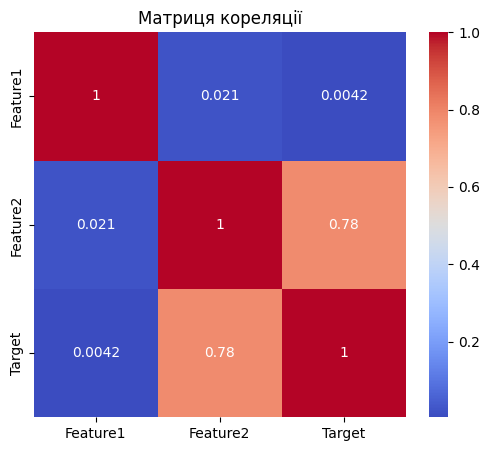

In [80]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Logistic Regression Results:
Accuracy: 90.0 %
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       104
         1.0       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:
[[97  7]
 [13 83]]
AUC-ROC Score: 0.946514423076923


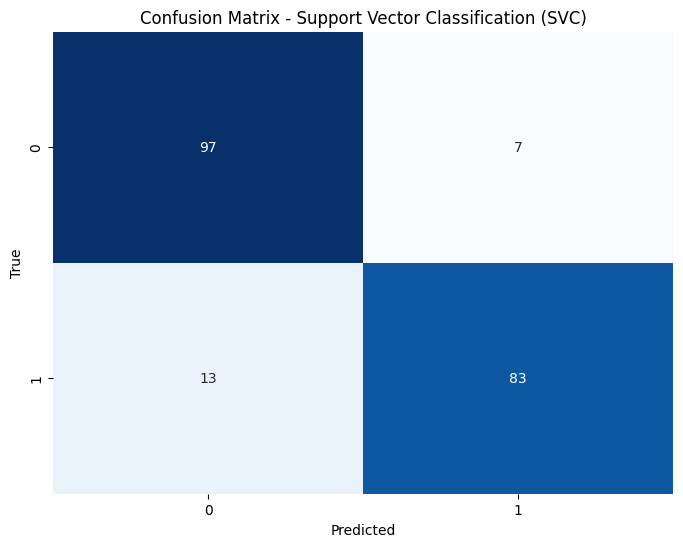

In [81]:
# Ініціалізація та навчання логістичної регресії
logistic_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Ймовірності для AUC-ROC

# Оцінка ефективності логістичної регресії
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic)*100, '%')
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba_logistic))

# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Для Logistic Regression---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Для Logistic Regression---

Спроба 1: 0.88
Спроба 2: 0.91
Спроба 3: 0.89
Спроба 4: 0.93
Спроба 5: 0.92

Середня точність: 0.90
Стандартне відхилення точності: 0.02



Support Vector Classification (SVC) Results:
Accuracy: 93.5 %
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       104
         1.0       0.97      0.90      0.93        96

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Confusion Matrix:
[[101   3]
 [ 10  86]]
AUC-ROC Score: 0.9811698717948718


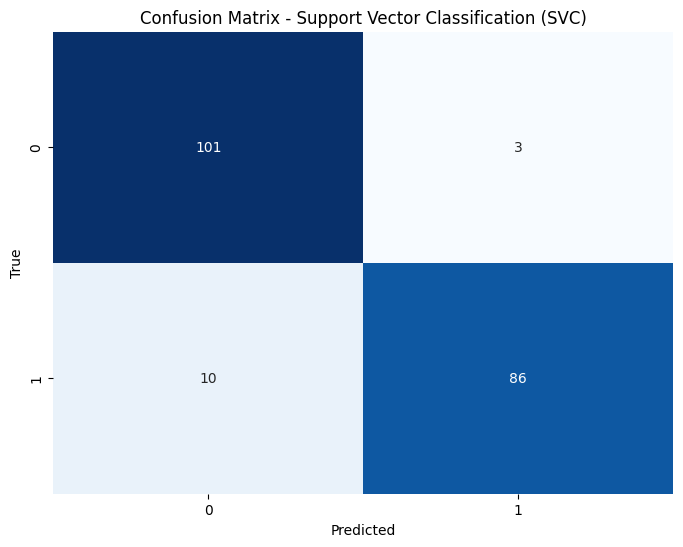

In [83]:
# Ініціалізація та навчання методу опорних векторів (SVC)
svc_model = SVC(probability=True, C=100, gamma=0.1, kernel='rbf')
svc_model.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.decision_function(X_test)  # Використовуйте decision_function для AUC-ROC

# Оцінка ефективності SVC
print("\nSupport Vector Classification (SVC) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc)*100, '%')
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba_svc))

# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

In [84]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Для SVC---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Для SVC---

Спроба 1: 0.94
Спроба 2: 0.93
Спроба 3: 0.94
Спроба 4: 0.96
Спроба 5: 0.94

Середня точність: 0.94
Стандартне відхилення точності: 0.01


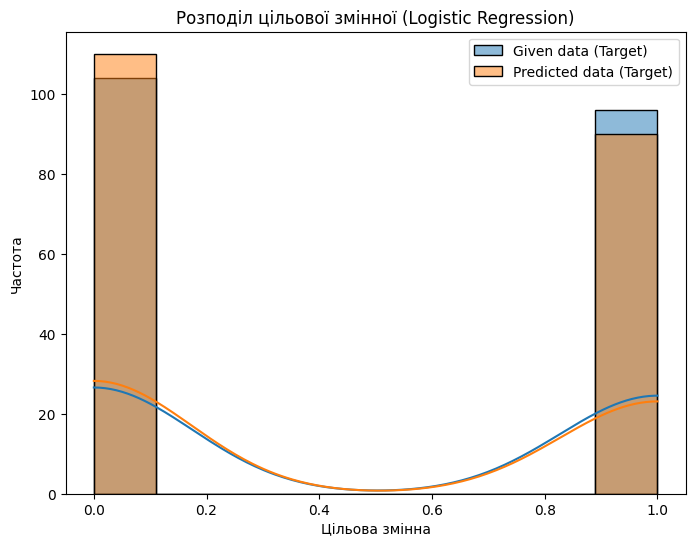

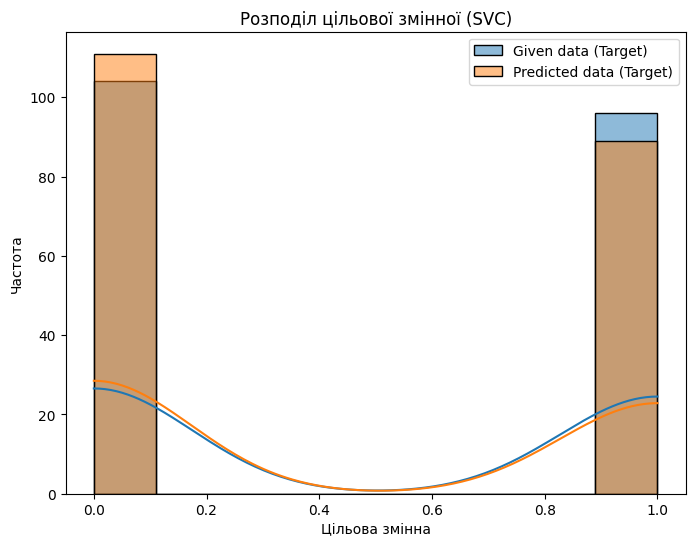

In [85]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 1)
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(y_pred_logistic, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної (Logistic Regression)')
plt.legend()
plt.show()

# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 2)
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(y_pred_svc, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної (SVC)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Графік логістичної регресії (SVC)')

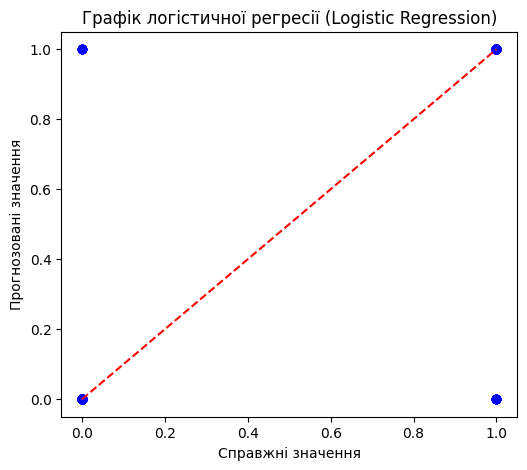

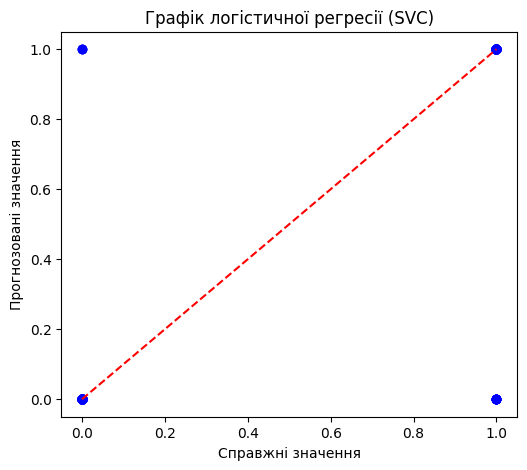

In [86]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_logistic, color='blue')
plt.plot([min(y), max(y)], [min(y_pred_logistic), max(y_pred_logistic)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії (Logistic Regression)")

# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_svc, color='blue')
plt.plot([min(y), max(y)], [min(y_pred_svc), max(y_pred_svc)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії (SVC)")

## Частина друга - Мультикласова класифікація (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
Порівняйте результати різних класифікаторів.

Мультикласова класифікація - це задача, в якій модель вивчає прогнозувати класи для більш ніж двох можливих значень цільової змінної. (Не тільки 0 чи 1)

### Підготовка даних

Підключення бібліотек

In [87]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
##
# from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [88]:

# Згенеруємо набір даних для мультикласової класифікації
X, y = make_classification(
    n_samples=1000,    # Кількість прикладів у наборі даних
    n_features=2,      # Кількість числових ознак
    n_informative=2,   # Кількість інформативних ознак
    n_redundant=0,     # Кількість зайвих ознак
    n_clusters_per_class=1,  # Кількість кластерів на клас
    n_classes=4,       # Кількість класів (більше трьох)
    random_state=42     # Випадковий стан для відтворюваності
)

# Об'єднаємо ознаки та мітки у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Target'])

# Збережемо дані у CSV файл
df.to_csv('data_for_part2.csv', index=False)

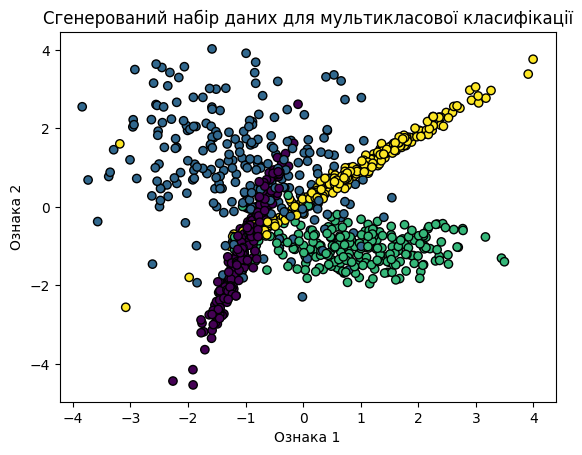

In [89]:
# Відобразимо створений набір даних
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Сгенерований набір даних для мультикласової класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

Завантаження даних для мультикласової класифікації з файлу

In [90]:
# Завантаження даних
data = pd.read_csv('data_for_part2.csv')

In [91]:
print(data.head())

   Feature1  Feature2  Target
0 -0.999102 -0.663860     3.0
1  1.246686  1.153597     3.0
2  0.962777  0.859397     3.0
3 -2.957441  2.033645     1.0
4  1.141165  1.059449     3.0


Перевірка на пропущені значення

In [92]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

# Нема

Series([], dtype: int64)


In [93]:
data['Target'].value_counts()

Target
3.0    252
1.0    250
2.0    250
0.0    248
Name: count, dtype: int64

Вибір цільової змінної

In [94]:
# Вибір цільової змінної (відгуку) та предикторів
np.random.seed(42)

X = data.drop(['Target'], axis=1)
y = data['Target']

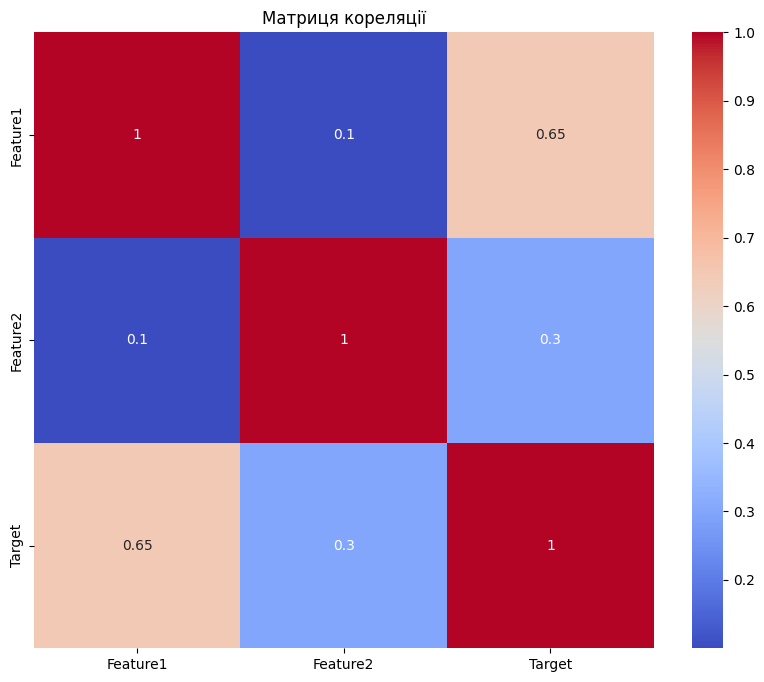

In [95]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

### Підбір гіперпараметрів

In [96]:
# # Визначення гіперпараметрів та їх значень
# param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}
# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X, y)
# best_params = grid_search.best_params_
# print(best_params)

# {'max_depth': 7, 'n_estimators': 100}

In [97]:
# # Визначення простору параметрів для Grid Search
# param_grid_svc = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'gamma': [0.1, 0.01, 0.001, 0.0001]}

# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
# grid_search_svc.fit(X, y)
# best_params_svc = grid_search_svc.best_params_
# print(best_params_svc)

# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [98]:
# # Стандартизація ознак
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = scaler.transform(y)

In [99]:
# # Визначення простору параметрів для Grid Search
# param_grid_lr = {'C': [0.1, 1, 10, 100],
#               'penalty': ['l1', 'l2'],
#               'fit_intercept': [True, False],
#               'solver': ['liblinear', 'saga']}

# # Grid Search з крос-валідацією
# grid_search_lr = GridSearchCV(LogisticRegression(max_iter=6000), param_grid_lr, cv=5)
# grid_search_lr.fit(X, y)
# best_params_lr = grid_search_lr.best_params_
# print(best_params_lr)

# {'C': 1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

### Тренування різних моделей використовуючи Cross-Validation

In [100]:
# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# 1. RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Оцінка ефективності RandomForestClassifier
print("---RandomForestClassifier Results:---")
print("\nAccuracy:", accuracy_score(y_test, rf_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

---RandomForestClassifier Results:---

Accuracy: 91.5 %

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        49
         1.0       0.94      0.73      0.82        44
         2.0       0.96      0.96      0.96        52
         3.0       0.90      0.95      0.92        55

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

Confusion Matrix:
[[49  0  0  0]
 [ 4 32  2  6]
 [ 1  1 50  0]
 [ 2  1  0 52]]


In [102]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Random Forest Classifier---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Random Forest Classifier---

Спроба 1: 0.89
Спроба 2: 0.86
Спроба 3: 0.90
Спроба 4: 0.90
Спроба 5: 0.88

Середня точність: 0.88
Стандартне відхилення точності: 0.01


In [103]:
# 2.SVC
svc_classifier = SVC(C=10, gamma=0.1, kernel='rbf')
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

# Оцінка ефективності RandomForestClassifier
print("---SVC Results:---")
print("\nAccuracy:", accuracy_score(y_test, svc_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, svc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))


---SVC Results:---

Accuracy: 88.0 %

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        49
         1.0       0.89      0.73      0.80        44
         2.0       0.96      0.94      0.95        52
         3.0       0.88      0.89      0.88        55

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.88       200
weighted avg       0.88      0.88      0.88       200

Confusion Matrix:
[[46  3  0  0]
 [ 3 32  2  7]
 [ 3  0 49  0]
 [ 5  1  0 49]]


In [104]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(svc_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---SVC---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---SVC---

Спроба 1: 0.86
Спроба 2: 0.84
Спроба 3: 0.86
Спроба 4: 0.84
Спроба 5: 0.85

Середня точність: 0.85
Стандартне відхилення точності: 0.01


In [105]:
# 3.Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, C=1, fit_intercept=True, penalty='l2', solver='saga')
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)

# Оцінка ефективності LogisticRegression
print("---Logistic Regression Results:---")
print("\nAccuracy:", accuracy_score(y_test, lr_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

---Logistic Regression Results:---

Accuracy: 82.5 %

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        49
         1.0       0.75      0.68      0.71        44
         2.0       0.96      0.90      0.93        52
         3.0       0.85      0.85      0.85        55

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.83       200

Confusion Matrix:
[[41  8  0  0]
 [ 5 30  2  7]
 [ 3  1 47  1]
 [ 7  1  0 47]]


In [106]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(lr_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Logistic Regression---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Logistic Regression---

Спроба 1: 0.81
Спроба 2: 0.81
Спроба 3: 0.84
Спроба 4: 0.79
Спроба 5: 0.83

Середня точність: 0.82
Стандартне відхилення точності: 0.02


### Візуалізація (Random Forest Classifier)

Гістограма

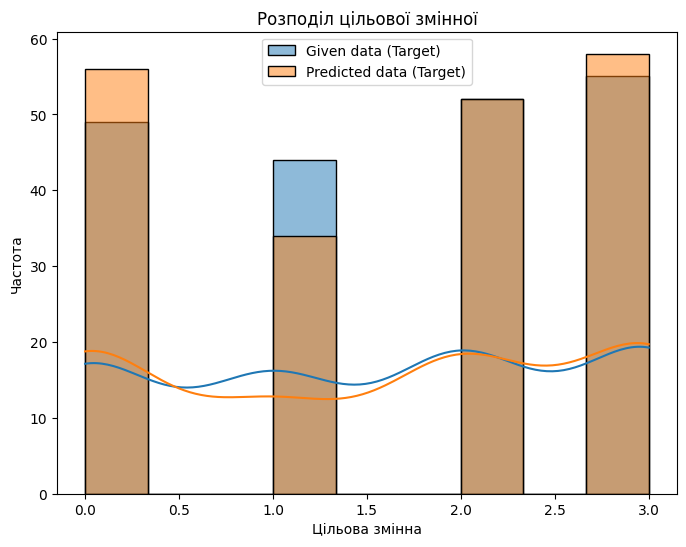

In [107]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(rf_pred, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.legend()
plt.show()

Матриця плутанини

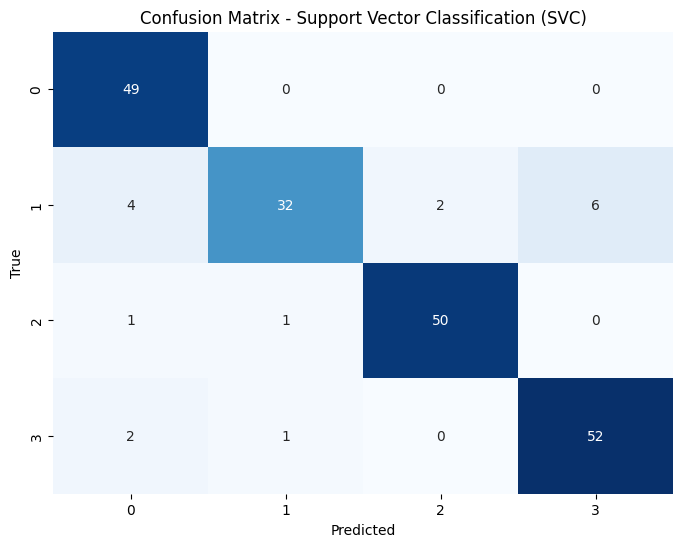

In [108]:
# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

Text(0.5, 1.0, 'Графік логістичної регресії')

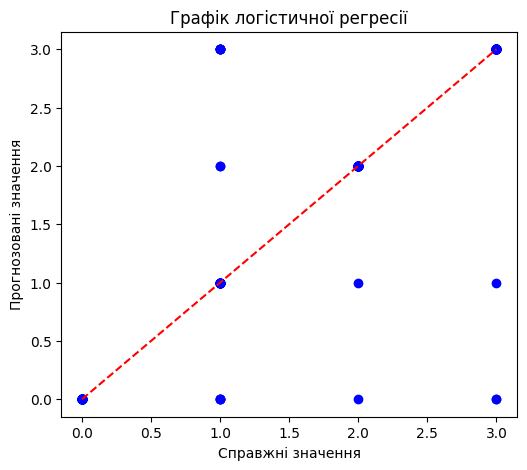

In [109]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, rf_pred, color='blue')
plt.plot([min(y), max(y)], [min(rf_pred), max(rf_pred)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії")

### Висновки
У ході виконання мультикласової класифікації були розділені дані на тастові та навчальні, були використані різні моделі та підібрані гіперпараметри до них. 

Також, був створений прогноз, оцінена точність моделей, і наявна візуалізація

## Частина третя - Мультилейблова класифікація (Multilabel Classification)

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації. Набір даних "multilabel_dataset.csv" містить Feature1, Feature2, Feature3, Labe1, Label2, Label3, Label4
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

Використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

### Data Analysis

In [110]:
# from sklearn.preprocessing import MultiLabelBinarizer
# import itertools

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors

np.random.seed(42)

In [111]:
# Завантаження даних
data = pd.read_csv('marketing_campaign_data_for_part3.csv',sep='\t')
pd.set_option('display.max_columns', None)
data.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [112]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.4f' % x)

# data.info()

In [113]:
# data.describe()

In [114]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [115]:
# If there is duplicate rows
data.duplicated().sum()

0

### Exploratory Data Analysis (розвідувальний аналіз даних)

1. Filling missing values

In [116]:
data['Income'] = data['Income'].fillna(data['Income'].median())

data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

2. Changing data type

In [117]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y")

data['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [118]:
data['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [119]:
data['Dt_Customer'].head(6)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
5   2013-09-09
Name: Dt_Customer, dtype: datetime64[ns]

3. Looking for columns with one type of data (to remove them).
 Z_CostContact and Z_Revenue

In [120]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [121]:
data = data.drop(columns = ["Z_CostContact", "Z_Revenue"],axis=1)

4. Uniting similar data in one new column: All Monetary(Грошові) types of products

In [122]:
# data["Monetary"] = data.loc[:,data.columns.str.contains("Mnt")].sum(axis=1)
# data.head()

5 Uniting similar data related to purchases into one new column: PurchasesAll

In [123]:
# data["Frequancy"] = data.loc[:,data.columns.str.contains("Purchases")].sum(axis=1)
# data.head()

### Data Preprocessing

In [124]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2240


In [125]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [126]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [127]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2023-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                     "Absurd":"Alone", "Widow":"Alone", 
                                                     "YOLO":"Alone", "Divorced":"Alone", 
                                                     "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [128]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [129]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [130]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2236


In [131]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [132]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.529793,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-1.191143,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.206659,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-1.062517,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.953679,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

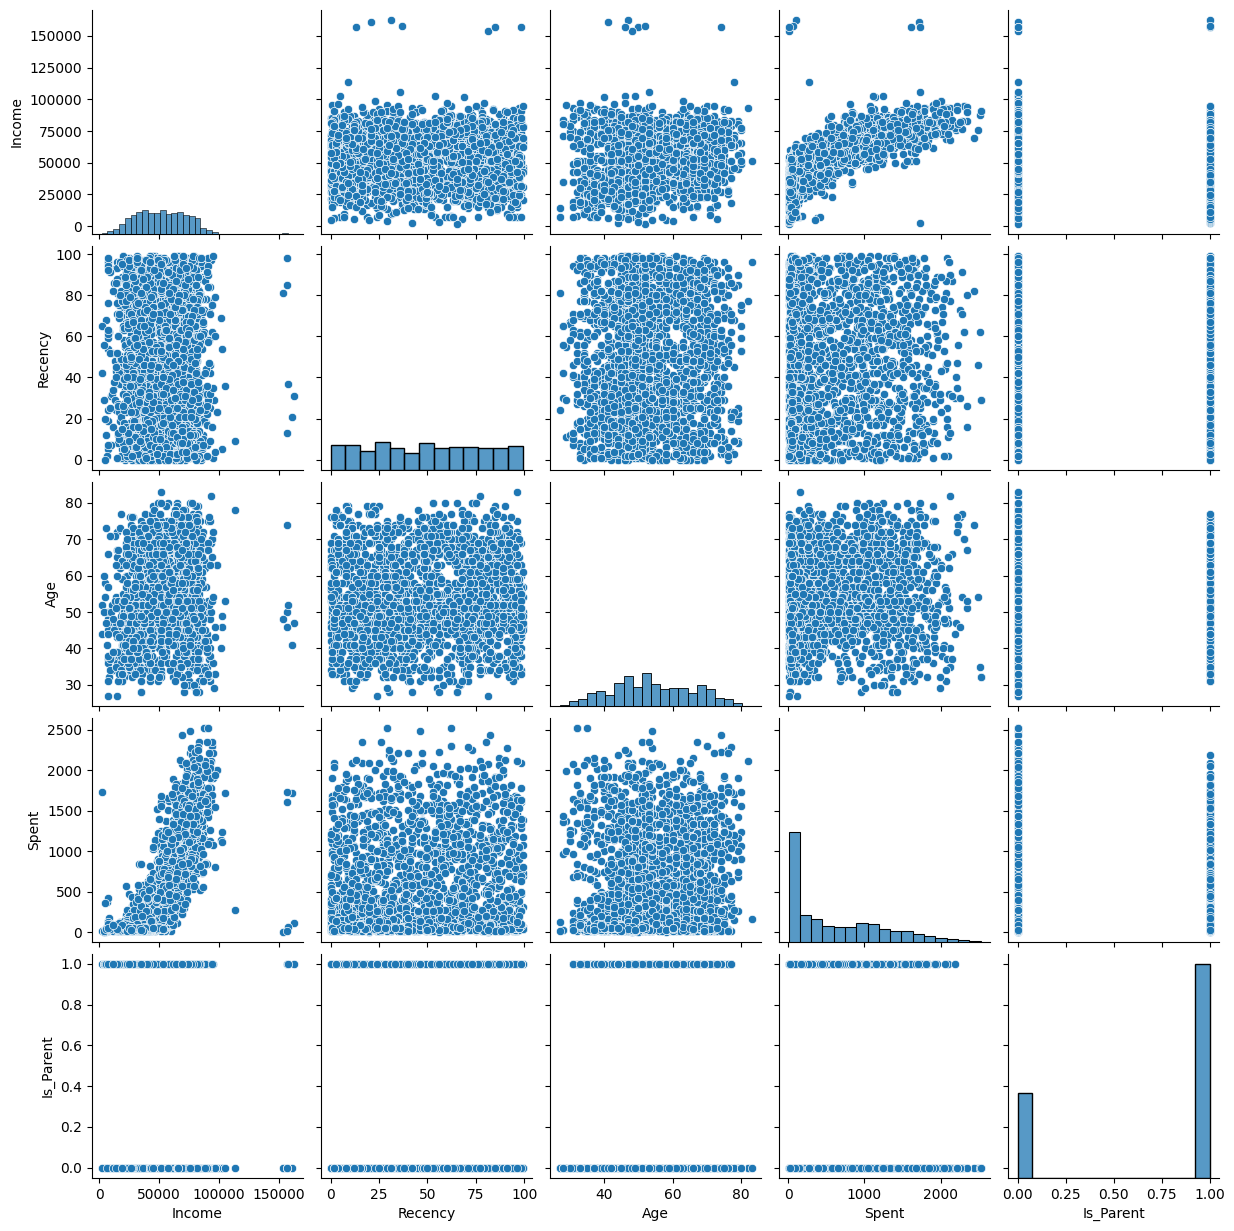

In [133]:
#To plot some selected features 

#Plotting following features
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot])
#Taking hue 
plt.show()

<Axes: >

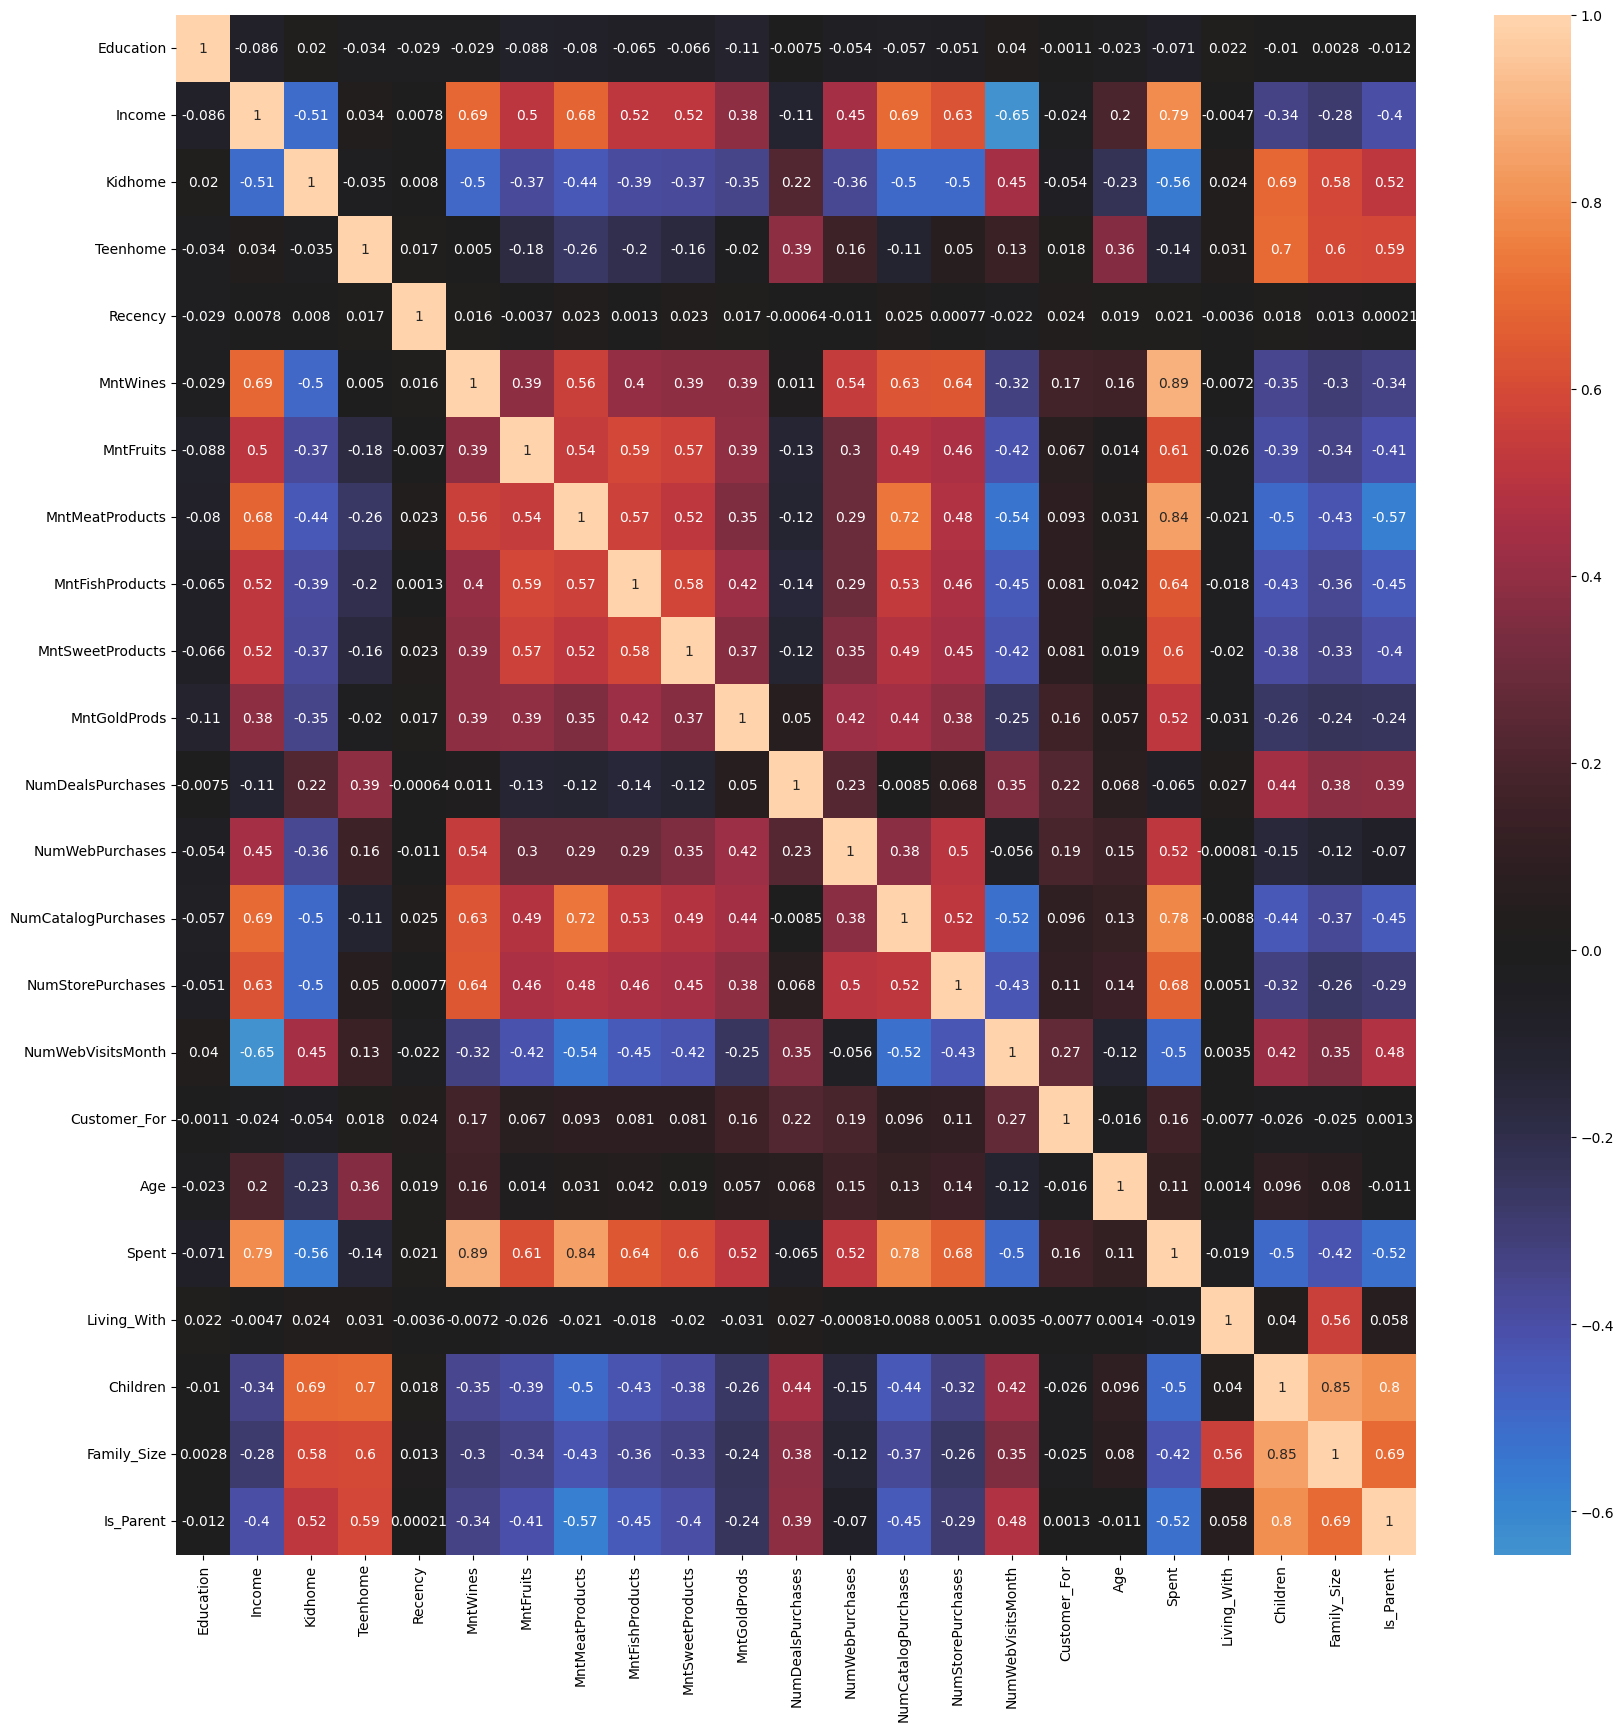

In [134]:
#correlation matrix
corrmat= scaled_ds.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

### Dimensionality (Feature) Reduction

In [135]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-6.355481e-18,2.873177,-5.973094,-2.528851,-0.782182,2.383734,7.457918
col2,2236.0,1.271096e-16,1.709077,-4.195125,-1.323104,-0.175172,1.238357,6.139834
col3,2236.0,4.687167e-17,1.229360,-3.587378,-0.838428,-0.069243,0.869450,6.684550


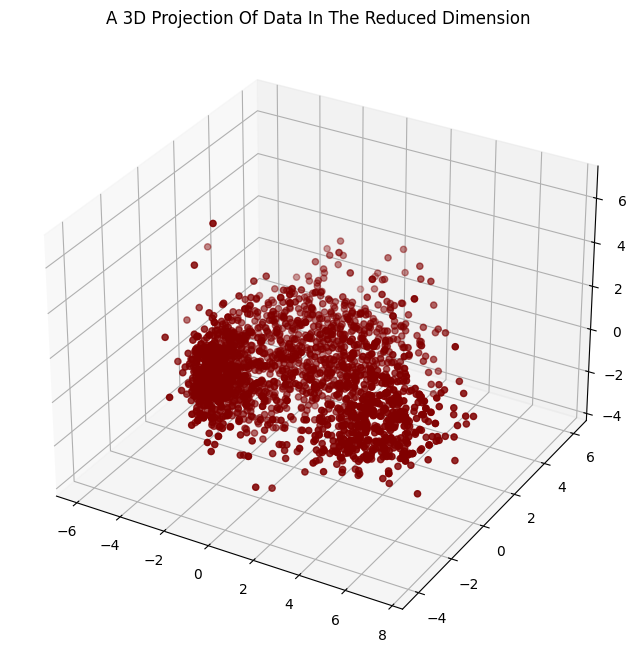

In [136]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering

In [137]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

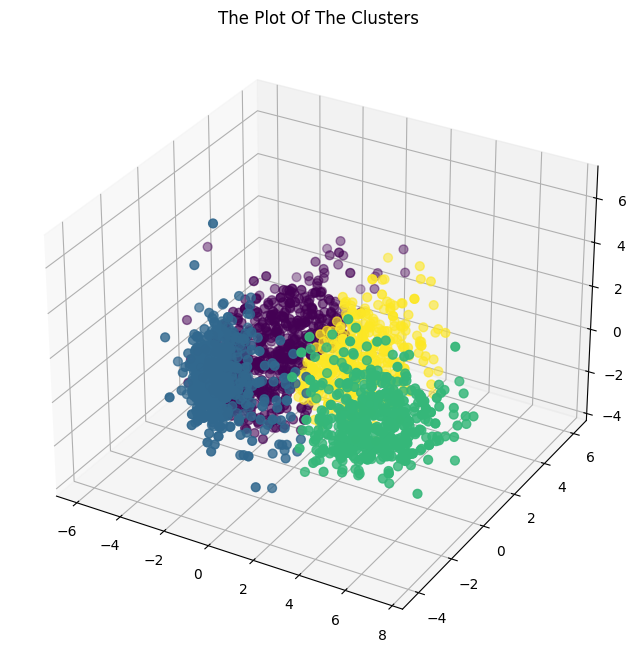

In [138]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### Evaluating Models

Looking at the group distribution of clustring

C:\Users\Анна\AppData\Local\Temp\ipykernel_12284\1859745431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


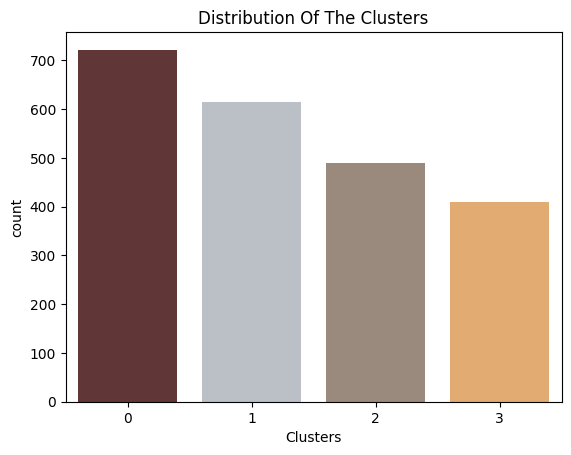

In [139]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

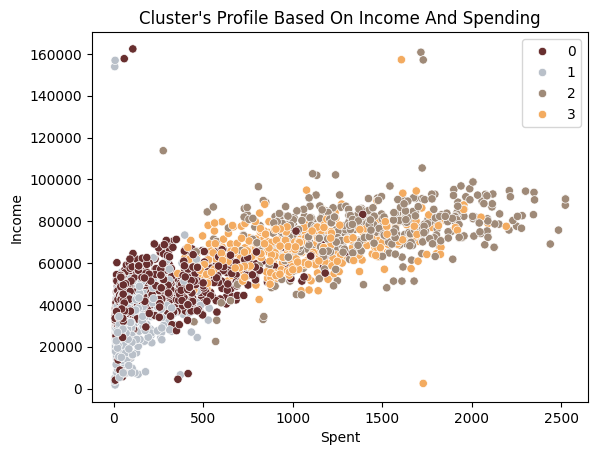

In [140]:
pl = sns.scatterplot(data = scaled_ds,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Clusters (Labels) Description:
group 0: high spending & average income;

group 1: high spending & high income;

group 2: low spending & low income;

group 3: high spending & low income;

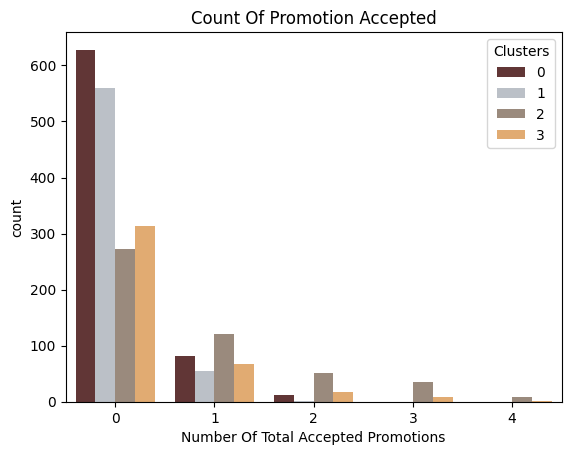

In [141]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns. Very few participants overall. 

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model.

### Висновок
У цій частині я використала Unsupervised Clustering для розділення даних на теги(labels).  
Я використала AgglomerativeClustering для тренування та передбачення моделі на даних.

Так як це Unsupervised Clustering, я не можу оцінити точність (та інші показники) моєї моделі. 
Я вирішила використовувати Unsupervised Clustering так як моя модель мала дуже багато features і не мала явних labels. А кластерінг допоміг мені розбити дані на категорії по ознакам

## Далі йде непотрібне

### Splitting data

In [142]:
# Розділення на ознаки (X) та цільові лейбли (y)
X = data[['Income', 'Spent']]
y = data[['Clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [143]:
# Встановлення однакових значень для всіх лейблів
uniform_label_value = 1
# y_train = pd.DataFrame(data=uniform_label_value, index=y_train.index, columns=y_train.columns)
# y_test = pd.DataFrame(data=uniform_label_value, index=y_test.index, columns=y_test.columns)

# Create the MultiOutputClassifier with RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=7, n_estimators=70)
multi_output_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the classifier
multi_output_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the performance for each label
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("Accuracy:", accuracy_score(y_test[label], y_pred[:, i]))
    # print("Recall:", recall_score(y_test[label], y_pred[:, i]))
    # print("F1 Score:", f1_score(y_test[label], y_pred[:, i]))


Results for Clusters:
Accuracy: 0.7075892857142857


In [144]:
# # Evaluate the performance for each label
# for i, label in enumerate(y.columns):
#     print(f"\nResults for {label}:")
#     print("Classification Report:")
#     print(classification_report(y_test[label], y_pred[:, i]))

### Візуалізація

Гістограми

In [145]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Оригінальні дані та передбачення
# original_data = y_test  # Оригінальні лейбли
# predicted_data = pd.DataFrame(data=y_pred, columns=y_test.columns)  # Передбачені лейбли

# # Візуалізація гістограм
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# fig.suptitle('Histograms of Original and Predicted Labels')

# # Розміри бінів
# bin_edges = np.arange(0, 2, 0.2)

# # Візуалізація для кожного лейбла
# for i, label in enumerate(y_test.columns):
#     row, col = divmod(i, 2)
    
#     # Оригінальні дані
#     axs[row, col].hist(original_data[label], bins=bin_edges, alpha=0.5, color='blue', label='Original')
    
#     # Передбачені дані
#     axs[row, col].hist(predicted_data[label], bins=bin_edges, alpha=0.5, color='orange', label='Predicted')
    
#     axs[row, col].set_title(label)
#     axs[row, col].legend()

# plt.tight_layout()
# plt.show()

Графіки

In [146]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Оригінальні дані та передбачення
# original_data = y_test  # Оригінальні лейбли
# predicted_data = pd.DataFrame(data=y_pred, columns=y_test.columns)  # Передбачені лейбли

# # Створення графіків для кожного лейбла
# for label in y_test.columns:
#     fig, ax = plt.subplots(figsize=(4, 3))
    
#     # Візуалізація оригінальних та передбачених значень
#     ax.scatter(original_data[label], predicted_data[label], alpha=0.8)
    
#     # Додавання лінії збігу
#     min_val = min(original_data[label].min(), predicted_data[label].min())
#     max_val = max(original_data[label].max(), predicted_data[label].max())
#     ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Perfect Prediction')
    
#     # Додавання легенди та меток осей
#     ax.set_title(f'Original vs Predicted Values for {label}')
#     ax.set_xlabel('Original Values')
#     ax.set_ylabel('Predicted Values')
#     ax.legend()
    
#     plt.show()

### Багатошарова нейронна мережа

In [147]:
# Встановлення однакових значень для всіх лейблів
uniform_label_value = 1
# y_train = pd.DataFrame(data=uniform_label_value, index=y_train.index, columns=y_train.columns)
# y_test = pd.DataFrame(data=uniform_label_value, index=y_test.index, columns=y_test.columns)

# Створення та навчання багатошарової нейронної мережі
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
multi_output_classifier_2 = MultiOutputClassifier(mlp_classifier, n_jobs=-1)
multi_output_classifier_2.fit(X_train, y_train)

# Прогнози на тестовому наборі
y_pred = multi_output_classifier_2.predict(X_test)

# Оцінка ефективності для кожного лейбла
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("Accuracy:", accuracy_score(y_test[label], y_pred[:, i]))
    # print("Recall:", recall_score(y_test[label], y_pred[:, i]))
    # print("F1 Score:", f1_score(y_test[label], y_pred[:, i]))



Results for Clusters:
Accuracy: 0.44419642857142855


In [148]:
# # Оцінка ефективності для кожного лейбла
# for i, label in enumerate(y.columns):
#     print(f"\nResults for {label}:")
#     print("\nClassification Report:")
#     print(classification_report(y_test[label], y_pred[:, i]))